# Dank Meme Classifier - Modelling

## Author: Devin Sit
## Student Number: 8197863

In [ ]:
!pip install pillow
!pip install tensorflow
!pip install keras
# etc

In [ ]:
# Key Hyperparameters

IMAGE_SIZE = 128
FINAL_DENSE_LAYERS_COUNT = 1
FINAL_DENSE_LAYERS_SIZE = 40
EPOCHS = 20
BATCH_SIZE = 40
DROPOUT_RATE = 0.5
LEARNING_RATE = 0.0001
IMAGE_SHEAR_RANGE = 0.2
IMAGE_ZOOM_RANGE = 0.2
IMAGE_WIDTH_SHIFT_RANGE = 0.1
IMAGE_HEIGHT_SHIFT_RANGE = 0.1

In [ ]:
import sys
from PIL import Image
sys.modules["Image"] = Image

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.callbacks import ModelCheckpoint

# Build the model

VGG16 = vgg16.VGG16(include_top=False, input_shape=(128, 128, 3))

model = Sequential()

for layer in VGG16.layers[:-1]:
  model.add(layer)
  
for layer in model.layers:
  layer.trainable = False

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

for i in range(FINAL_DENSE_LAYERS_COUNT):
    model.add(Dense(FINAL_DENSE_LAYERS_SIZE, activation="relu"))
    
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(2, activation="softmax"))

model.compile(
    keras.optimizers.Adam(lr=LEARNING_RATE),
    "categorical_crossentropy",
    metrics=['accuracy']
)

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [ ]:
# Setup image generators

number_of_training_samples = 24000
number_of_validation_samples = 6000

train_datagen = ImageDataGenerator(
    shear_range=IMAGE_SHEAR_RANGE, 
    zoom_range=IMAGE_ZOOM_RANGE, 
    width_shift_range=IMAGE_WIDTH_SHIFT_RANGE, 
    height_shift_range=IMAGE_HEIGHT_SHIFT_RANGE
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    "/tmp/data/training",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    "/tmp/data/validation",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 24000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [ ]:
# Train the model

filename = "dank_meme_classifier.h5"
checkpoint = ModelCheckpoint(filename, monitor="val_acc", verbose=1, save_best_only=True, mode="max")

history = model.fit_generator(
    train_generator,
    steps_per_epoch=number_of_training_samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=number_of_validation_samples // BATCH_SIZE,
    callbacks = [checkpoint]
)

Epoch 1/20
600/600 [==============================] - 185s 309ms/step - loss: 1.8887 - acc: 0.5283 - val_loss: 0.7011 - val_acc: 0.5373

Epoch 00001: val_acc improved from -inf to 0.53733, saving model to vgg16_complex_small_images_40_dense_checkpoint.h5
Epoch 2/20
600/600 [==============================] - 183s 305ms/step - loss: 0.6933 - acc: 0.5626 - val_loss: 0.6877 - val_acc: 0.5605

Epoch 00002: val_acc improved from 0.53733 to 0.56050, saving model to vgg16_complex_small_images_40_dense_checkpoint.h5
Epoch 3/20
600/600 [==============================] - 183s 305ms/step - loss: 0.6826 - acc: 0.5704 - val_loss: 0.6819 - val_acc: 0.5623

Epoch 00003: val_acc improved from 0.56050 to 0.56233, saving model to vgg16_complex_small_images_40_dense_checkpoint.h5
Epoch 4/20
600/600 [==============================] - 183s 305ms/step - loss: 0.6782 - acc: 0.5732 - val_loss: 0.6805 - val_acc: 0.5665

Epoch 00004: val_acc improved from 0.56233 to 0.56650, saving model to vgg16_complex_small_i

Text(0.5,1,'Accuracy Curves')

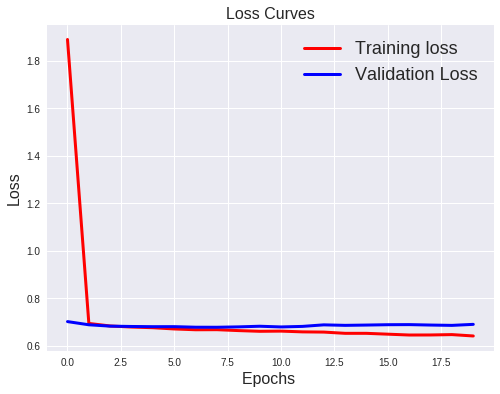

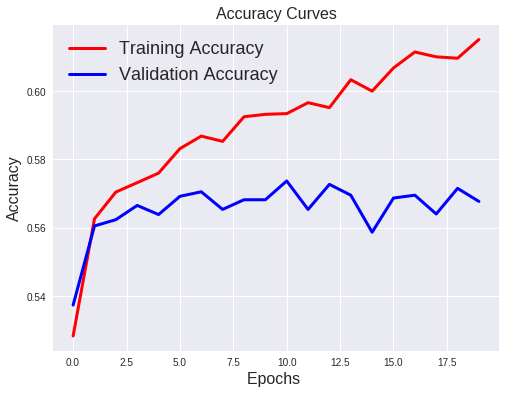

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
model.save(filename)